# Investigative Data Set

### The RMS Titanic Data Set

The goal of this data analysis will be to answer two primary questions-- 
1) Did a passenger's socio-economic status have an affect on their chance of survival? 
2) Did a person's gender and age have an affect on their chance of survival?



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Wrangle The Data

Start by reading in the titanic_train.csv file into a pandas dataframe.

In [16]:
#import data set
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing Data


I will use the Seaborn Library to create a simple heatmap to see if there is missing data.

Text(0.5,1,'Heatmap of Missing Data')

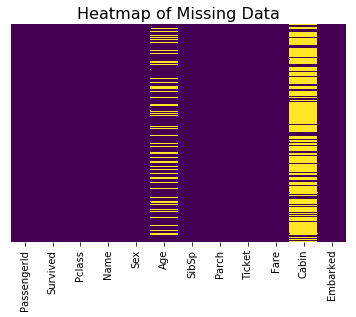

In [17]:
#missing data will appear in yellow
g = sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
g.axes.set_title('Heatmap of Missing Data', fontsize=16)

Figure represents missing data in yellow. It appears ~20% of the Age data is missing which is small for reasonable replacement with some form of imputation. But, the Cabin column is missing too much data for it be useful information. 

### Clean the Data
I want to fill in the missing age data instead of dropping the missing age data rows. I'm going to accomplish this by filling in the mean age of all the passengers (imputation) based on the average age by passenger class.

Text(0.5,1,'Boxplot of Passenger Age vs Class Data')

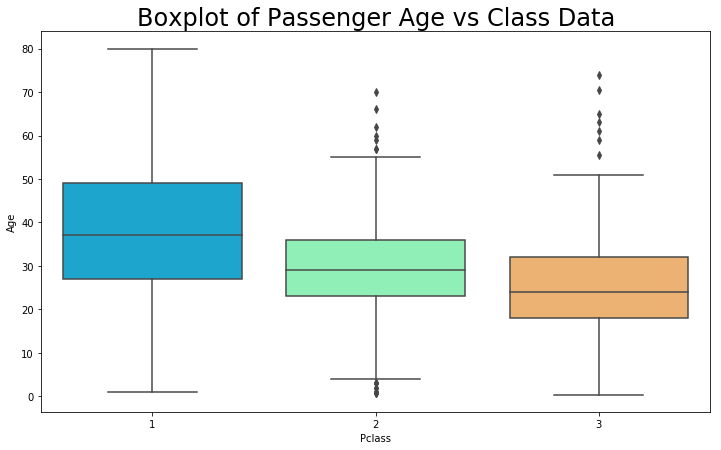

In [18]:
#Boxplot of Class vs Age
plt.figure(figsize=(12, 7))
g = sns.boxplot(x='Pclass',y='Age',data=train,palette='rainbow')
g.axes.set_title('Boxplot of Passenger Age vs Class Data', fontsize=24)

Boxplot representing the passenger age as a function of the passenger class data. The main objective of this visualization is to get a mean age for the various passenger class and use that information to make a better imputation in our data cleaning stage. As you can see, the wealthier passengers in the higher classes tend to be older, which makes sense. The averge ages based on class are as follows: 1st=~37, 2nd=~29, 3rd=~24.

Text(0.5,1,'Passenger Age vs Class')

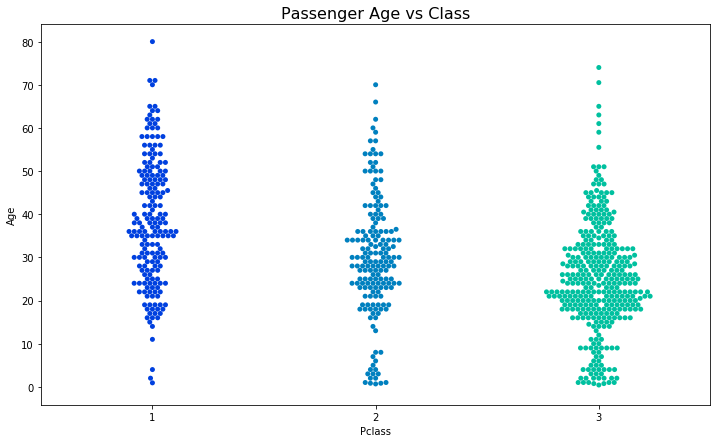

In [6]:
#Plot of Age vs Pclass
plt.figure(figsize=(12, 7))
g = sns.swarmplot(x='Pclass',y='Age',data=train,palette='winter')
g.axes.set_title('Passenger Age vs Class', fontsize=16)

The visualization represents the distribution of passengers based on their age and passenger class. As you can see, their is larger number of older, wealthier passengers in the 1st class and 2nd classes while the youngest population on board the Titanic were in the 3rd class. Also of note, the 3rd class contains the majority of children 10 and under. 

In [7]:
#Imputation to fill in the missing data

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [8]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Text(0.5,1,'Heatmap of Missing Data')

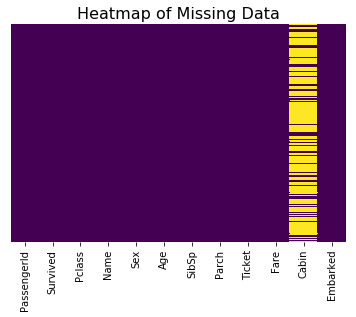

In [9]:
#missing data will appear in yellow
g = sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
g.axes.set_title('Heatmap of Missing Data', fontsize=16)

Figure represents missing data in yellow. As you can see, there is no more missing Age data, now I will drop the Cabin column and the NaN value in the Embarked column.

In [10]:
train.drop('Cabin',axis=1,inplace=True)

In [11]:
train.dropna(inplace=True)

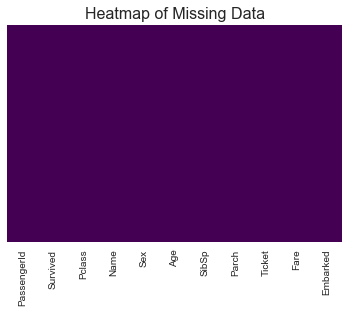

In [11]:
g = sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
g.axes.set_title('Heatmap of Missing Data', fontsize=16)

Figure will present missing data in yellow. As you can see there are no yellow values which means that there are no missing values in the dataset. We can now move on to the data analysis phase. 

## Exploratory Data Analysis

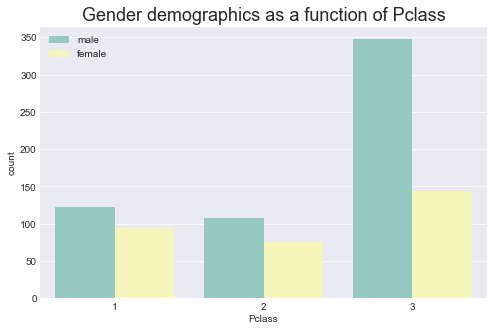

In [20]:
## Gender demographics as a function of Passenger Class
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
g = sns.countplot(x='Pclass',hue='Sex',data=train,palette='Set3')
g.axes.set_title('Gender demographics as a function of Pclass', fontsize=18)
g.legend(loc=2)

Visualization of the gender demographics as a function of the Passenger Class. As you can see the majority of the passengers were located in the 3rd class. Within the 3rd class, there were nearly 2.3 times as many men as there were women. 

Passenger Count as a function of gender:


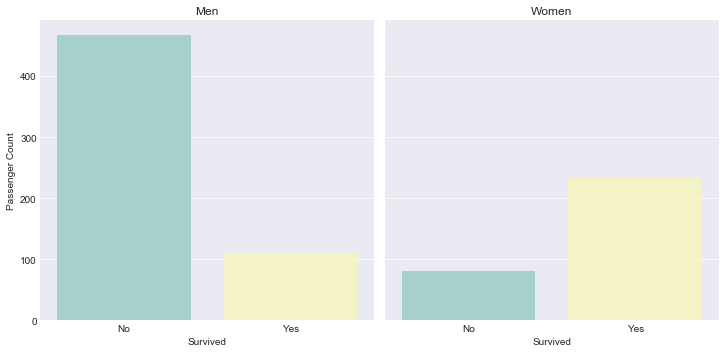

In [24]:
#graph of survival count as a function of gender

print("Passenger Count as a function of gender:")
g = sns.factorplot('Survived', col='Sex', data=train, kind='count', size=5,alpha=.8,palette='Set3')
(g.set_axis_labels('Survived', 'Passenger Count')).set_xticklabels(["No", "Yes"])

titles = ['Men', 'Women']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)


This visualization is a representation of the survival count based on gender demographics. Most men did not survive the accident while around 2/3rd of the women on board did survive.  

Passenger Count as a function of Passenger Class:


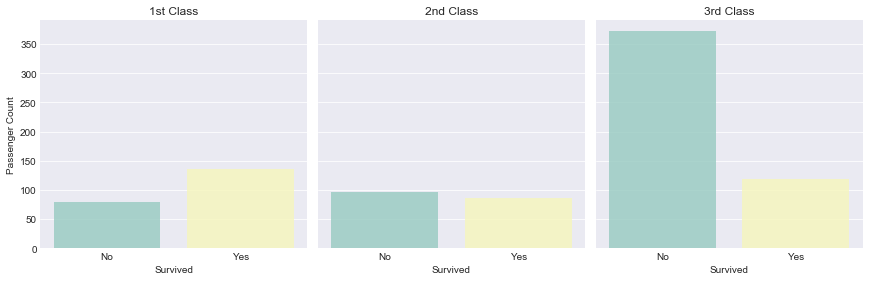

In [25]:
#Graph of Survival Count vs Passenger Class

print("Passenger Count as a function of Passenger Class:")
g = sns.factorplot('Survived', col='Pclass', data=train, kind='count', size=4,alpha=.8,palette='Set3')
(g.set_axis_labels('Survived', 'Passenger Count')).set_xticklabels(["No", "Yes"])

titles = ['1st Class', '2nd Class', '3rd Class']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

This visualization is a representation of the survival count as a function of the passenger class. From the above plot, it seems that more people survived than died in the 1st Class. Passengers in the 2nd class had around similar count of people in survived and dead group. Majority of people died in 3rd class. 

Passenger Count as a function of Class and Gender:


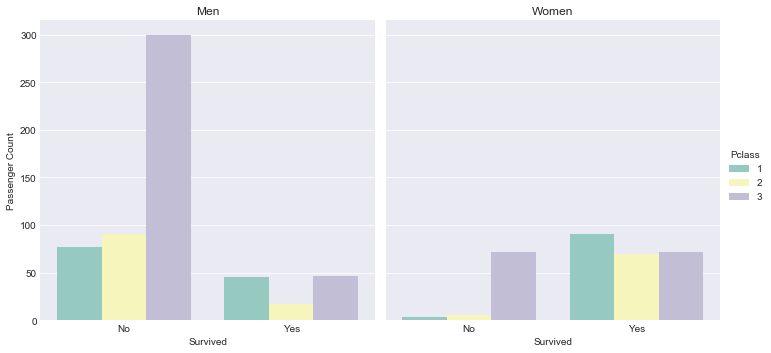

In [26]:
#Passenger survival count as a function of class and gender

print("Passenger Count as a function of Class and Gender:")
g = sns.factorplot('Survived', col='Sex', hue='Pclass', data=train, kind='count',size=5,palette='Set3')
(g.set_axis_labels('Survived', 'Passenger Count')).set_xticklabels(["No", "Yes"])


titles = ['Men', 'Women']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

Above plot is representation of the survival count categorized by gender and class.It seems that there were significant men in 3rd class who did not survive the tragedy. Similarly, Women in the 3rd class also had the lowest survival count.  

Distribution of Age as a function of Gender: 


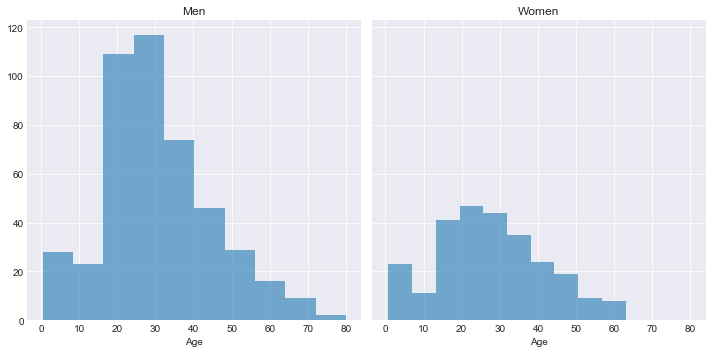

In [28]:
#Distribution of ages as a funtion of gender

print("Distribution of Age as a function of Gender: ")
g = sns.FacetGrid(data=train,col='Sex',size=5,palette='Set3')
g.map(plt.hist,'Age', alpha=0.6)

titles = ['Men', 'Women']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

Above plot is a continuous distribution plot of passenger age categorized by gender. It seems that there were a lot more men aboard the Titanic than women. The vast majority of men were aged between 19-35, while the women on board had a normal distribution with a mean of around 20-23 years of age.

Distribution of Fare Price:


Text(0.5,1,'Fare Price')

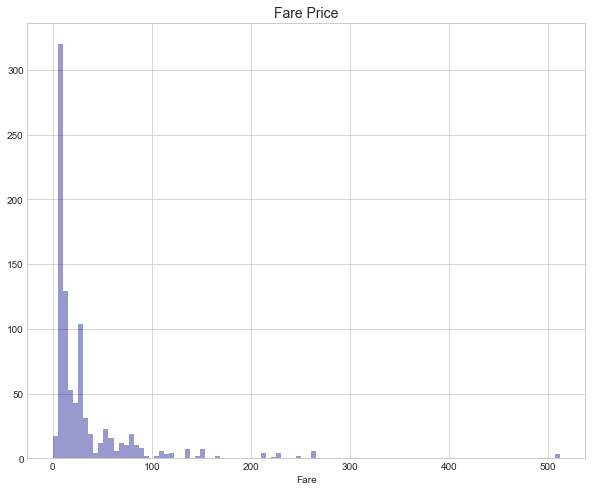

In [29]:
#Frequency of Fare Price

print("Distribution of Fare Price:")
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
g= sns.distplot(train['Fare'].dropna(),kde=False,color='darkblue',bins=100)
g.axes.set_title('Fare Price', fontsize=14) 

This visualization represents a frequencey plot as a function of fare price. It seems that the majority tickets were  between 10-80 dollars with the vast majority of tickets purchased for $10. 

# Descriptive Statistical Analysis

In [30]:
# Descriptive statistics
print("Descriptive statistics based on Survived, Pclass and Age data:")
survival_stats= train.drop(['PassengerId','Name','Ticket','Fare','Embarked','SibSp','Parch'], axis=1)
survival_stats.describe()

Descriptive statistics based on Survived, Pclass and Age data:


,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


This table represents the continuous variable characteristics for the passenger survival data. There are 889 points in the dataset, 38% of the passengers survived, the mean age among the survivors was 29 years old.

In [31]:
# use groupby() to get descriptive statistics on class, suvival and sex
print("Descriptive Statistics based on Class, Survived and Gender:")
survival_stats.groupby(['Pclass','Survived','Sex']).describe()

Descriptive Statistics based on Class, Survived and Gender:


Age                                            \
                        count       mean        std    min    25%   50%   
Pclass Survived Sex                                                       
1      0        female    3.0  25.666667  24.006943   2.00  13.50  25.0   
                male     61.0  44.581967  14.457749  18.00  33.00  45.5   
       1        female   82.0  34.939024  13.223014  14.00  23.25  35.0   
                male     40.0  36.248000  14.936744   0.92  27.00  36.0   
2      0        female    6.0  36.000000  12.915107  24.00  26.25  32.5   
                male     84.0  33.369048  12.158125  16.00  24.75  30.5   
       1        female   68.0  28.080882  12.764693   2.00  21.75  28.0   
                male     15.0  16.022000  19.547122   0.67   1.00   3.0   
3      0        female   55.0  23.818182  12.833465   2.00  15.25  22.0   
                male    215.0  27.255814  12.135707   1.00  20.00  25.0   
       1        female   47.0  19.329787  12.303246   0.75  13.50  19.0   
                male     38.0  22.274211  11.555786   0.42  16.50  25.0   

                                     
                          75%   max  
Pclass Survived Sex                  
1      0        female  37.50  50.0  
                male    56.00  71.0  
       1        female  44.00  63.0  
                male    48.00  80.0  
2      0        female  42.50  57.0  
                male    39.00  70.0  
       1        female  35.25  55.0  
                male    31.50  62.0  
3      0        female  31.00  48.0  
                male    34.00  74.0  
       1        female  26.50  63.0  
                male    29.75  45.0

This table represents the passenger survival data, looking specifically at passenger class, age, and survival status. As you can see, within the 1st class the avg. age among survivors was 35 for women and 36 for men. Among 2nd class survivors the avg among survivors was 28 for women and 17 for men. For the 3rd class, avg age among women was 21 and 23 for men.

# Question 1

### Were socio-economic status and gender a function of survival?

In [32]:
# Use the groupby function that returns the survival rate based on gender and passenger class. 
# Returns survival rate/percentage of sex and class
def survival_rate(Pclass, Sex):
    total = survival_stats.groupby(['Pclass', 'Sex']).size()[Pclass,Sex].astype('float')
    survived_gender = \
        survival_stats.groupby(['Pclass','Survived','Sex']).size()[Pclass,1,Sex].astype('float')
    survived_gender_pct = (survived_gender / total * 100).round(1)
    
    return survived_gender_pct

In [33]:
#Grouped by class, survival and sex
print ('\n')
print ("Survival Rate as a function of a passengers gender and socio-economic status")
print ('\n')
print ('1st Class: male survival rate: {}%'.format(survival_rate(1,'male')))
print ('1st Class: female survival rate: {}%'.format(survival_rate(1,'female')))

print ('\n')
print ('2nd Class: male survival rate: {}%'.format(survival_rate(2,'male')))
print ('2nd Class: female survival rate: {}%'.format(survival_rate(2,'female')))

print ('\n')
print ('3rd Class: male survival rate: {}%'.format(survival_rate(3,'male')))
print ('3rd Class: female survival rate: {}%'.format(survival_rate(3,'female')))



Survival Rate as a function of a passengers gender and socio-economic status


1st Class: male survival rate: 36.9%
1st Class: female survival rate: 96.8%


2nd Class: male survival rate: 15.7%
2nd Class: female survival rate: 92.1%


3rd Class: male survival rate: 13.5%
3rd Class: female survival rate: 50.0%


This table represents the survival rate ordered by class and gender. It seems that, 1st & 2nd class women had the highest survival rate of 96.74% and 92.11%, respectively. The drop in survival rate between the 2nd and 3rd class women was quite significant, however, the 2nd and 3rd class men had the lowest survival rate of 15.74% and 13.54%, respectively.

Text(0.5,0.98,'Survival Rate as a function of Gender & Class')

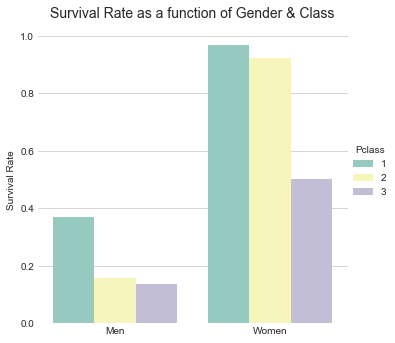

In [35]:
#Grouped by class, survival and sex
g = sns.factorplot(x="Sex", y="Survived", hue="Pclass", data=survival_stats, kind="bar", ci=None , palette='Set3', size=5)
# Fix up the labels
(g.set_axis_labels('', 'Survival Rate')
     .set_xticklabels(["Men", "Women"])
     .set_titles("Class {col_name}")
     .set(ylim=(0, 1))
     .despine(left=True, bottom=True)) 

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Survival Rate as a function of Gender & Class', fontsize=14)

This visualization is representing the survival rate based on a passenger's gender and class. As you can see, men in general had less than a 40% chance of survival while a 1st and 2nd class woman had higher than a 93% chance of survival.

# Question 2

### Did women and children have a better chance of survival?



Survival Statistics including Children:


Category  Survived
Child     0            52
          1            61
Man       0           325
          1            70
Woman     0            47
          1           159
dtype: int64


Survival Count including Children: 




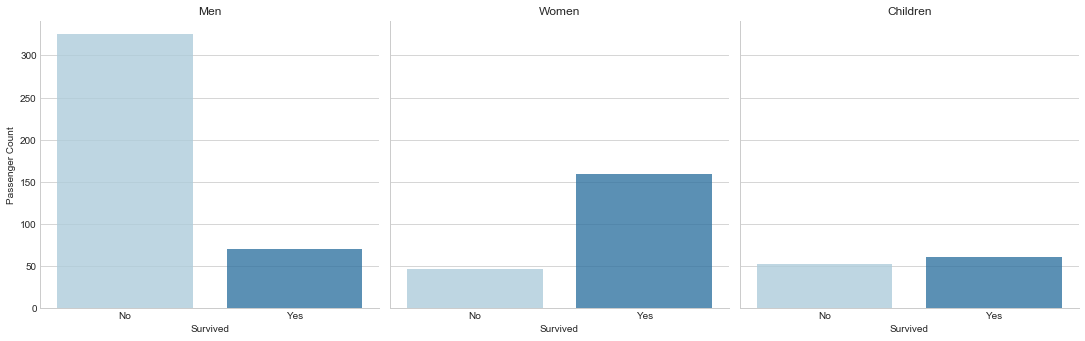

In [36]:
# Create a categorical column
survival_stats.loc[
    ((survival_stats['Sex'] == 'female') & 
     (survival_stats['Age'] >= 18)),
     'Category'] = 'Woman'

survival_stats.loc[
    ((survival_stats['Sex'] == 'male') & 
    (survival_stats['Age'] >= 18) ),
    'Category'] = 'Man'

survival_stats.loc[
    (survival_stats['Age'] < 18),
    'Category'] = 'Child'

#Use groupby() to get the total count based on the Category and Survived data
print('\n')
print('Survival Statistics including Children:')
print('\n')
print (survival_stats.groupby(['Category','Survived']).size())

print('\n')
print('Survival Count including Children: ')
print('\n')

#Comparison graph of survival count between Men, Women and Children
g = sns.factorplot('Survived', col='Category', data=survival_stats, kind='count', size=5,alpha=.8,palette='Paired')
g.fig.subplots_adjust(top=0.9)
(g.set_axis_labels('Survived', 'Passenger Count')).set_xticklabels(["No", "Yes"])

titles = ['Men', 'Women', 'Children']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

This is a visualization of survival count as a function of gender and age, paying special attention to children under 18 years of age. As you can see, children had a 46% chance of survival, most likely due to the fact most where located in the 3rd class and perhaps didn't have enough time to get to the life boats.

# Conclusion

The results of the analysis indicate that a higher socio-economic status (ie.1st class) and a person's gender had the greatest impact on a passenger’s survival rate. Results indicate that a woman in the 1st class had the highest survival rate of 96% while a man located in the 3rd class (low socio-economic status) gave a passenger the lowest survival rate. 

A positive linear trend between Age and Pclass was present, most young adults and children were located in 3rd class with an average of age of 24, 2nd class had an average age of 29 and the 1st class had the oldest average age of 37. This makes sense if the 3rd class had a population of young, single men and young families immigrating to America from the UK. While the 1st class was most likely comprised of businessmen and older people who have had time to accumulate wealth. Also of note, the data indicates that Age was not a major factor in survival rate. In general, women and children, across all classes, had a higher survival rate than men but by no means did being a child or woman guarantee survival. 

Limitations of the dataset and further research possibilities are numerous. The missing data in the Cabin and Age columns were of particular concern. Although the imputation used for the age data is statistically sound option, there was no good option to fill in the gaps, so to speak, with the Cabin data. The Fare data is a particularly tough variable to deal with in this data set. Does the fare represent the individual price paid by each passenger or does it represent the price a person as a whole-which might include more than 1 ticket bought for people traveling together (such as a family)? Is there any information on the ticket that could be of use in answering whether or not a person paid for more than one ticket? Finally, the next step would be to input the data into a logistic regression model to predict the classification between survival and deceased passengers.

The sinking of the RMS Titanic has always fascinated me because it has had such a deep impact on human kind and so was super excited to work on this dataset. 
